In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [4]:
iris = load_iris()
X_scaled = StandardScaler().fit_transform(iris.data)

print("Original dataset shape: ", iris.data.shape)
print("Features: ", iris.feature_names)
print("Target classes: ", iris.target_names)

Original dataset shape:  (150, 4)
Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes:  ['setosa' 'versicolor' 'virginica']


In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("\nPCA Results: ")
print("Explained variance ratio: ", pca.explained_variance_ratio_)
print("Total variance explained: {:.2f}%".format(sum(pca.explained_variance_ratio_) * 100))


PCA Results: 
Explained variance ratio:  [0.72962445 0.22850762]
Total variance explained: 95.81%


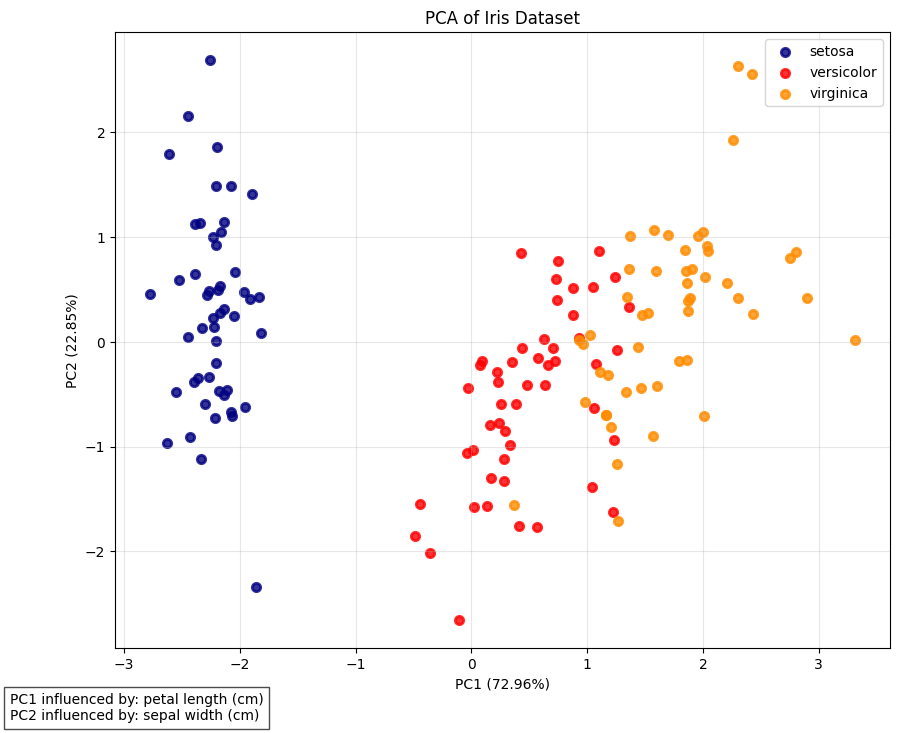

In [8]:
plt.figure(figsize=(10, 8))
colors = ['navy', 'red', 'darkorange']

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_pca[iris.target == i, 0], X_pca[iris.target == i, 1], 
                color=color, alpha=0.8, lw=2, label=target_name)

plt.legend(loc='best', shadow=False)
plt.title('PCA of Iris Dataset')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.grid(alpha=0.3)
pc1_top = iris.feature_names[np.argmax(abs(pca.components_[0]))]
pc2_top = iris.feature_names[np.argmax(abs(pca.components_[1]))]
plt.figtext(0.02, 0.02, f"PC1 influenced by: {pc1_top}\nPC2 influenced by: {pc2_top}", 
            bbox=dict(facecolor='white', alpha=0.7))

plt.show()

In [9]:
print('\nPCA Details (Components loadings): ')
for i, comp in enumerate(pca.components_):
    loadings = ", ".join([f"{feat}: {weight:.3f}" for feat, weight in zip(iris.feature_names, comp)])
    print(f"PC{i+1}: {loadings}")


PCA Details (Components loadings): 
PC1: sepal length (cm): 0.521, sepal width (cm): -0.269, petal length (cm): 0.580, petal width (cm): 0.565
PC2: sepal length (cm): 0.377, sepal width (cm): 0.923, petal length (cm): 0.024, petal width (cm): 0.067
